**Dhimas Sena Rahmantara**

**dhimassr@gmail.com**

In [2]:
import os, math, datetime, random
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
os.listdir()

['.ipynb_checkpoints', 'student_performance.csv', 'student_performance.ipynb']

In [6]:
sdf = pd.read_csv('student_performance.csv')
sdf

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [8]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [10]:
sdf.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [12]:
sdf.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [14]:
sdf.columns = sdf.columns.str.lower().str.replace(' ', '_')

In [16]:
sdf.columns

Index(['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index'],
      dtype='object')

In [18]:
sdf.shape

(10000, 6)

In [20]:
np.unique(sdf.hours_studied)

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [22]:
np.unique(sdf.previous_scores)

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [24]:
np.unique(sdf.extracurricular_activities)

array(['No', 'Yes'], dtype=object)

In [26]:
np.unique(sdf.sleep_hours)

array([4, 5, 6, 7, 8, 9], dtype=int64)

In [28]:
np.unique(sdf.sample_question_papers_practiced)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [30]:
np.unique(sdf.performance_index)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100.])

In [32]:
sdf.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
previous_scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
sleep_hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
sample_question_papers_practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
performance_index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [34]:
hs = sdf.groupby(['hours_studied'])['hours_studied'].count()
hs

hours_studied
1    1152
2    1085
3    1119
4    1085
5    1094
6    1133
7    1129
8    1088
9    1115
Name: hours_studied, dtype: int64

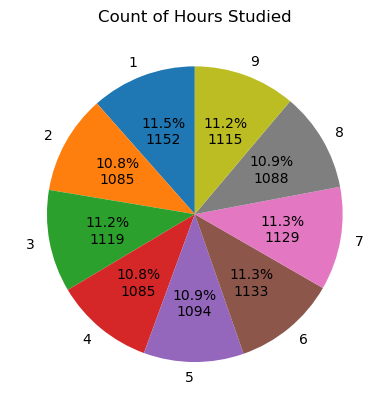

In [36]:
def fmt(x):
    # print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(hs)*x/100)


plt.pie(hs, labels=np.unique(sdf['hours_studied']), startangle=90, autopct=fmt)
plt.title("Count of Hours Studied")
plt.show()

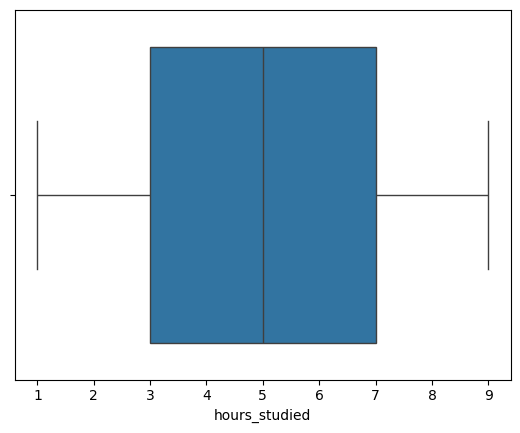

In [38]:
sns.boxplot(data=sdf, x='hours_studied')
plt.show()

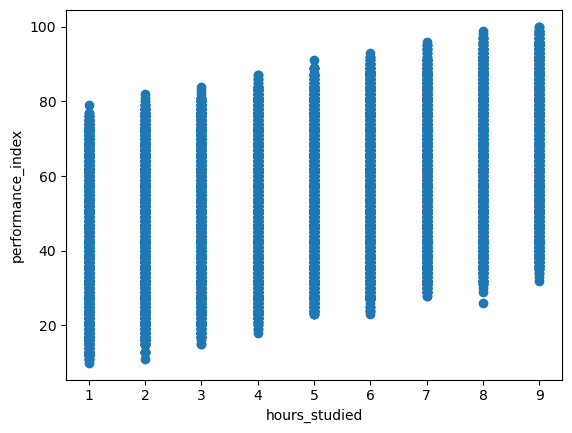

In [40]:
plt.scatter(sdf.hours_studied, sdf.performance_index)
plt.ticklabel_format(style='plain')
plt.xlabel('hours_studied')
plt.ylabel('performance_index')
plt.show()

In [42]:
ps = sdf.previous_scores.value_counts()
ps = pd.DataFrame(ps)
ps = ps.sort_values('previous_scores', ascending=False)
ps.head()

,count
previous_scores,
99,159
98,158
97,174
96,159
95,169


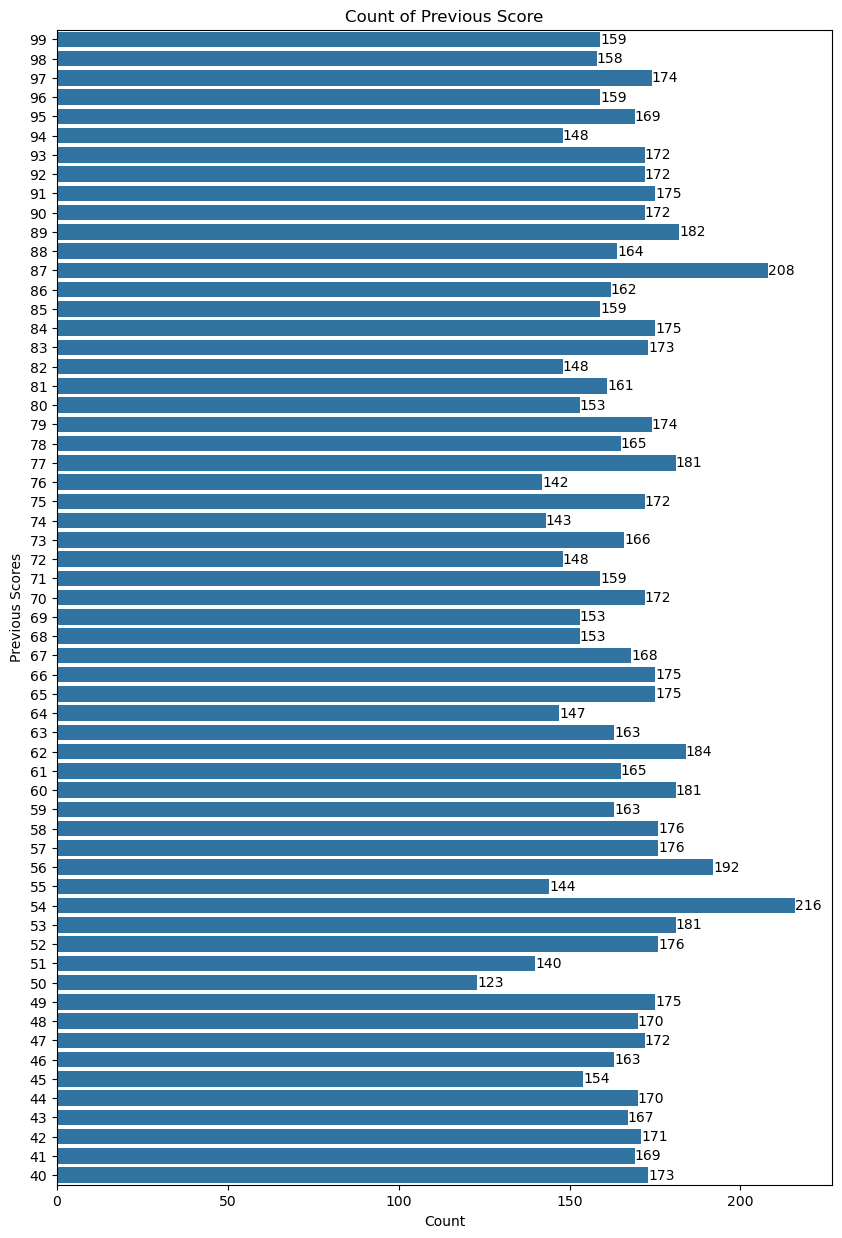

In [44]:
plt.figure(figsize=(10, 15))
g = sns.barplot(
    data=ps, x="count", y='previous_scores', orient='h', order=ps.index
)
g.bar_label(g.containers[0])
        
plt.title("Count of Previous Score")
plt.xlabel("Count")
plt.ylabel("Previous Scores")
plt.show()

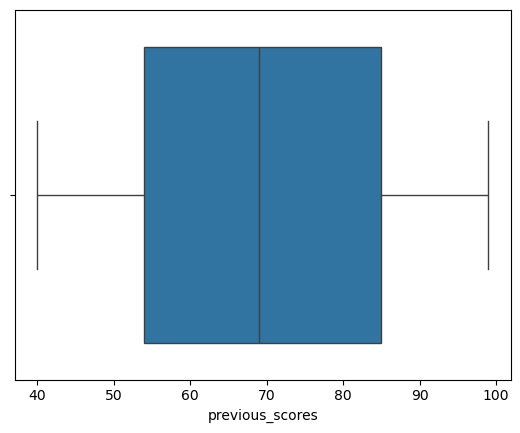

In [46]:
sns.boxplot(data=sdf, x='previous_scores')
plt.show()

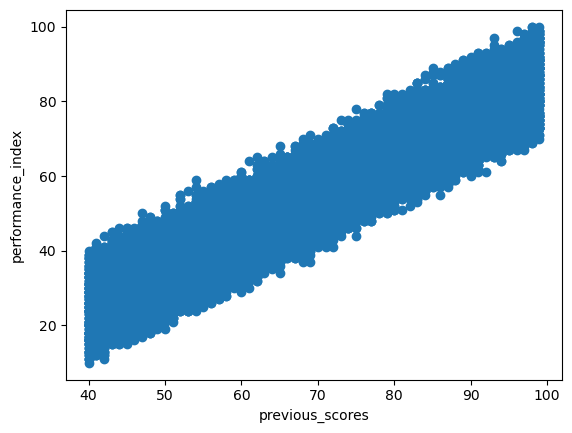

In [48]:
plt.scatter(sdf.previous_scores, sdf.performance_index)
plt.ticklabel_format(style='plain')
plt.xlabel('previous_scores')
plt.ylabel('performance_index')
plt.show()

In [50]:
ec = sdf.extracurricular_activities.value_counts()
ec

extracurricular_activities
No     5052
Yes    4948
Name: count, dtype: int64

50.52000284194946
49.480000138282776


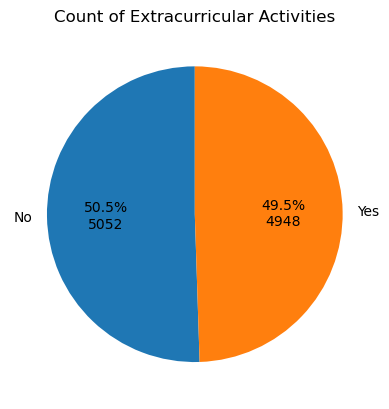

In [52]:
def fmt(x):
    print(x)
    return '{:.1f}%\n{:.0f}'.format(x, sum(ec)*x/100)


plt.pie(ec, labels=np.unique(sdf.extracurricular_activities), startangle=90, autopct=fmt)
plt.title("Count of Extracurricular Activities")
plt.show()

In [54]:
sh = sdf.sleep_hours.value_counts()
sh = pd.DataFrame(sh)
sh = sh.sort_values('sleep_hours', ascending=True)
sh

,count
sleep_hours,
4,1619
5,1606
6,1673
7,1676
8,1804
9,1622


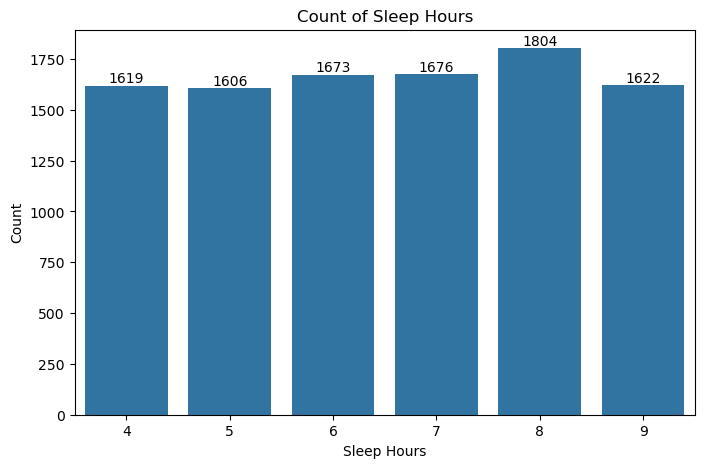

In [56]:
plt.figure(figsize=(8, 5))
g = sns.barplot(
    data=sh, x='sleep_hours', y='count',
)
g.bar_label(g.containers[0])
        
plt.title("Count of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Count")
plt.show()

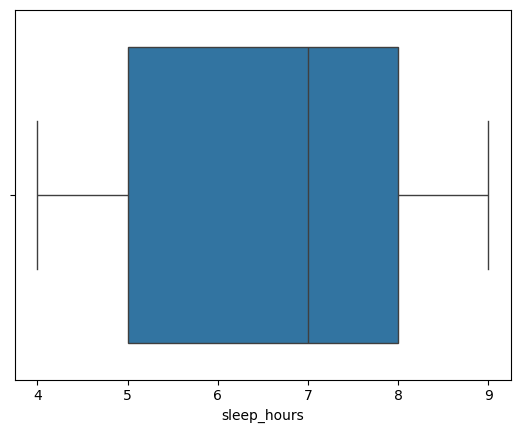

In [58]:
sns.boxplot(data=sdf, x='sleep_hours')
plt.show()

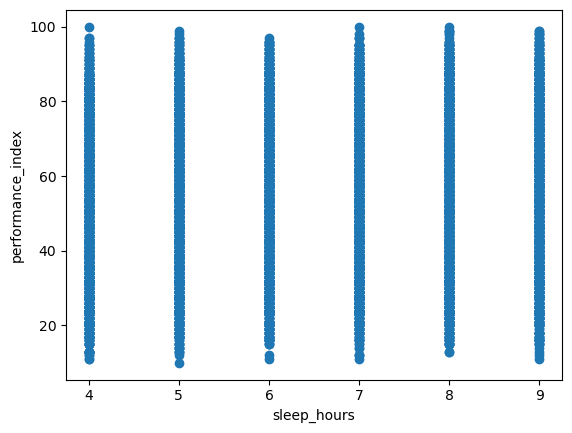

In [60]:
plt.scatter(sdf.sleep_hours, sdf.performance_index)
plt.ticklabel_format(style='plain')
plt.xlabel('sleep_hours')
plt.ylabel('performance_index')
plt.show()

In [62]:
sq = sdf.sample_question_papers_practiced.value_counts()
sq = pd.DataFrame(sq)
sq = sq.sort_values('sample_question_papers_practiced', ascending=True)
sq

,count
sample_question_papers_practiced,
0,951
1,978
2,930
3,1035
4,955
5,1028
6,1059
7,987
8,1026


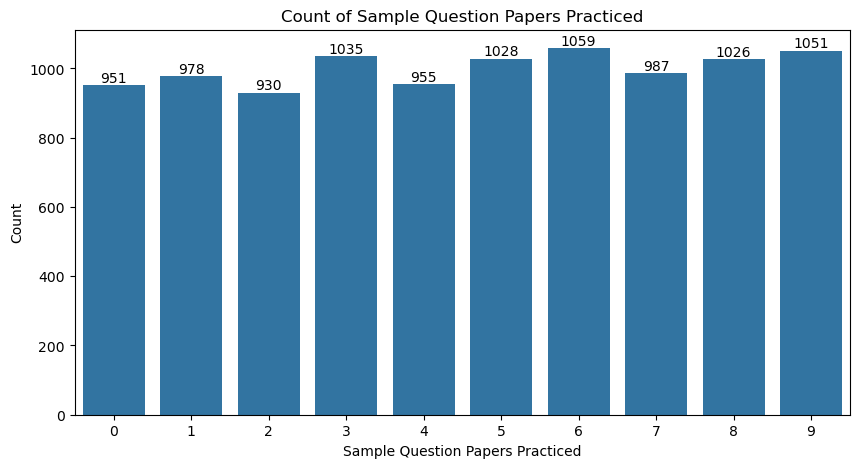

In [68]:
plt.figure(figsize=(10, 5))
g = sns.barplot(
    data=sq, x='sample_question_papers_practiced', y='count',
)
g.bar_label(g.containers[0])
        
plt.title("Count of Sample Question Papers Practiced")
plt.xlabel("Sample Question Papers Practiced")
plt.ylabel("Count")
plt.show()

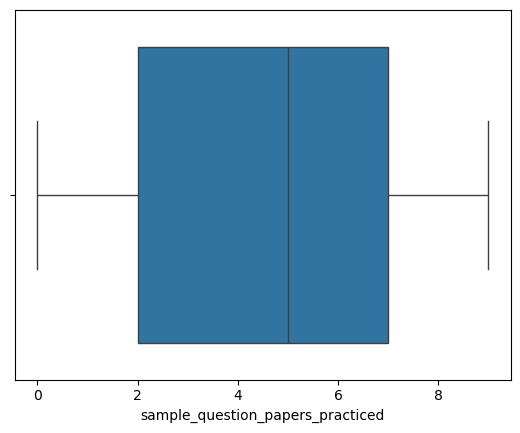

In [70]:
sns.boxplot(data=sdf, x='sample_question_papers_practiced')
plt.show()

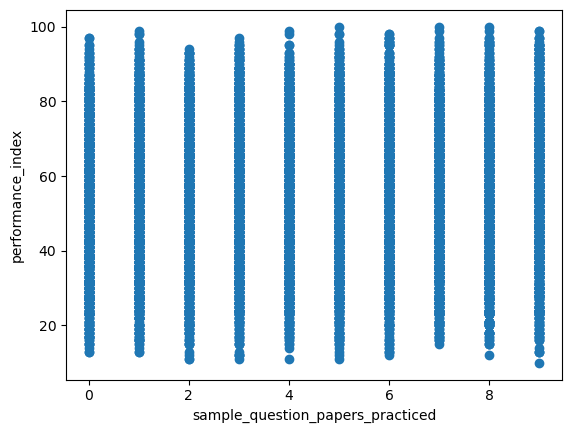

In [72]:
plt.scatter(sdf.sample_question_papers_practiced, sdf.performance_index)
plt.ticklabel_format(style='plain')
plt.xlabel('sample_question_papers_practiced')
plt.ylabel('performance_index')
plt.show()

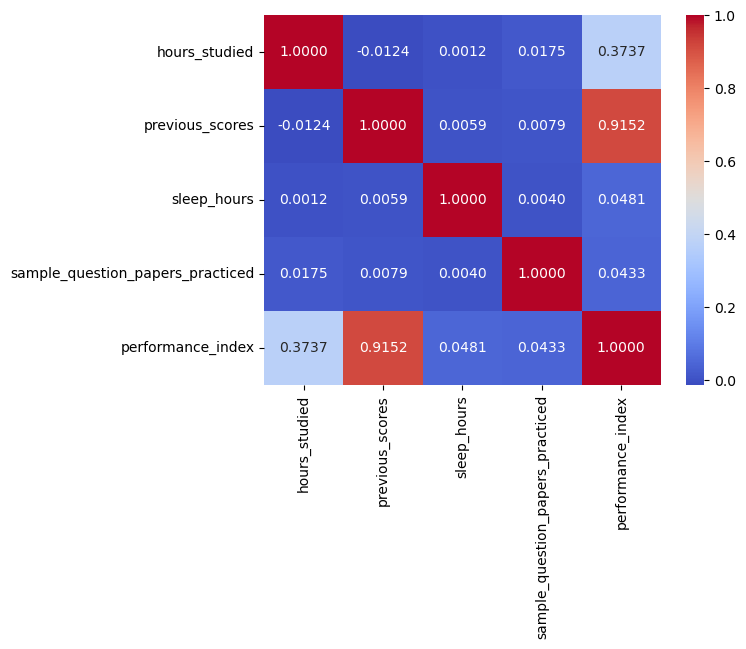

In [74]:
sns.heatmap(sdf.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.4f')
plt.show()

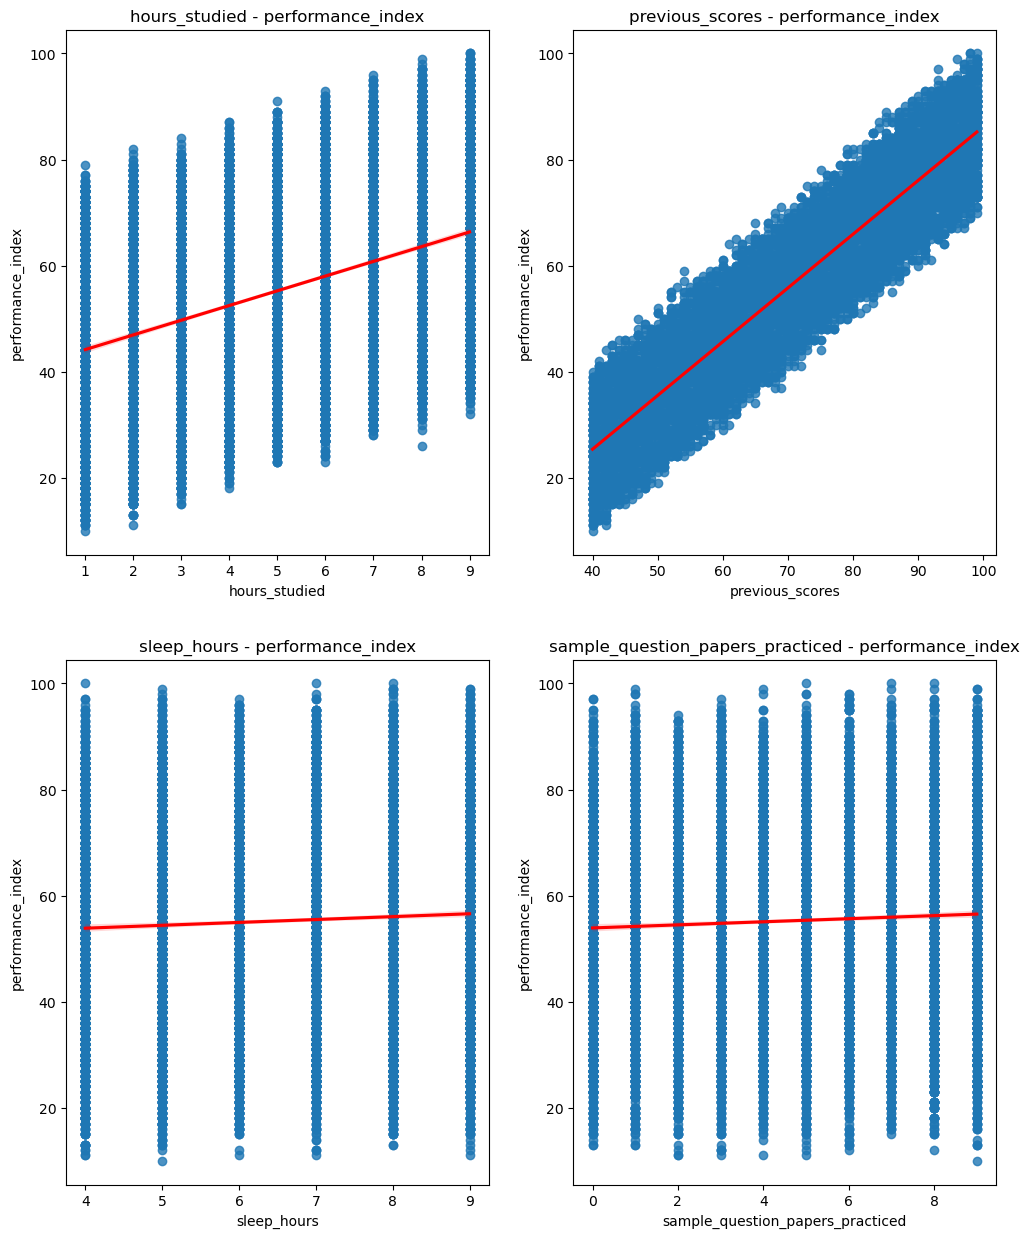

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(12, 15))

sns.regplot(data=sdf, x='hours_studied', y='performance_index', line_kws={"color": "red"}, ax=axes[0][0])
axes[0][0].set_title('hours_studied - performance_index')

sns.regplot(data=sdf, x='previous_scores', y='performance_index', line_kws={"color": "red"}, ax=axes[0][1])
axes[0][1].set_title('previous_scores - performance_index')

sns.regplot(data=sdf, x='sleep_hours', y='performance_index', line_kws={"color": "red"}, ax=axes[1][0])
axes[1][0].set_title('sleep_hours - performance_index')

sns.regplot(data=sdf, x='sample_question_papers_practiced', y='performance_index', line_kws={"color": "red"}, ax=axes[1][1])
axes[1][1].set_title('sample_question_papers_practiced - performance_index')

plt.show()

**Simple Linear Regression Analysis Hours Studied - Performance Index**

In [78]:
X = sdf[['hours_studied']]  # Fitur independen
y = sdf['performance_index']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [94]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Intercept :{model.intercept_}") #intercept = nilai y, saat nilai x = 0
print(f"Slope :{model.coef_}") #slope = delta y / delta x

MSE: 321.8145
R-squared: 0.1316
Intercept :41.4366348265358
Slope :[2.78430044]


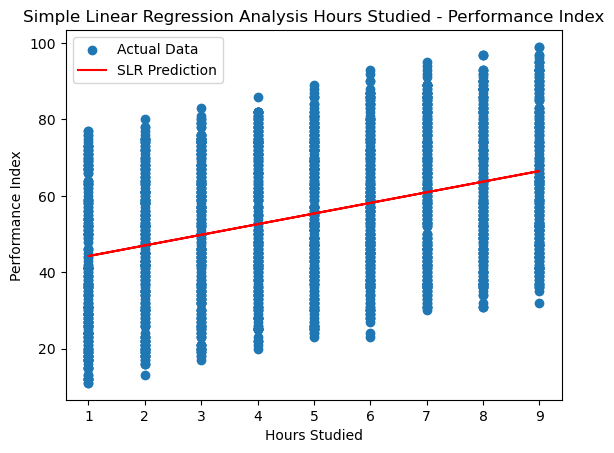

In [82]:
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='SLR Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Simple Linear Regression Analysis Hours Studied - Performance Index')
plt.legend()
plt.show()


In [84]:
jam_belajar = np.array([0.5, sdf.hours_studied.min(), sdf.hours_studied.max(), 10]).reshape(-1,1)
jam_belajar

array([[ 0.5],
       [ 1. ],
       [ 9. ],
       [10. ]])

In [86]:
prediksi = model.predict(jam_belajar)
prediksi

array([42.82878505, 44.22093527, 66.4953388 , 69.27963924])

In [88]:
for hs, p in zip(jam_belajar, prediksi):
    print(f"jam belajar: {hs} prediksi: {p}")

jam belajar: [0.5] prediksi: 42.82878504712118
jam belajar: [1.] prediksi: 44.220935267706565
jam belajar: [9.] prediksi: 66.49533879707266
jam belajar: [10.] prediksi: 69.27963923824342


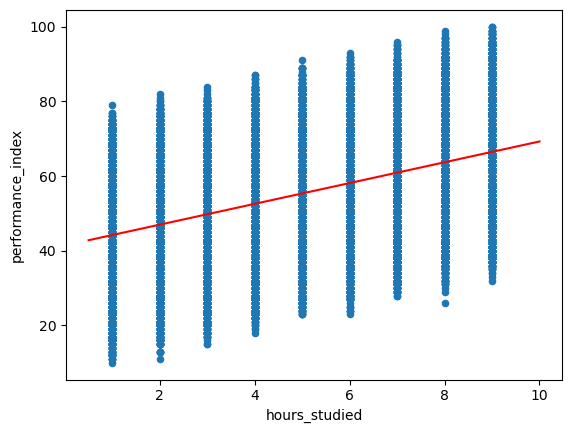

In [90]:
sdf.plot(kind='scatter', x='hours_studied', y='performance_index')
plt.plot(jam_belajar, prediksi, c='red')
plt.ticklabel_format(style='plain')
plt.show()

**Simple Linear Regression Analysis Previous Scores - Performance Index**

In [96]:
X = sdf[['previous_scores']]  # Fitur independen
y = sdf['performance_index']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [98]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Intercept :{model.intercept_}") #intercept = nilai y, saat nilai x = 0
print(f"Slope :{model.coef_}") #slope = delta y / delta x

MSE: 58.9491
R-squared: 0.8409
Intercept :-15.104435146091426
Slope :[1.0127272]


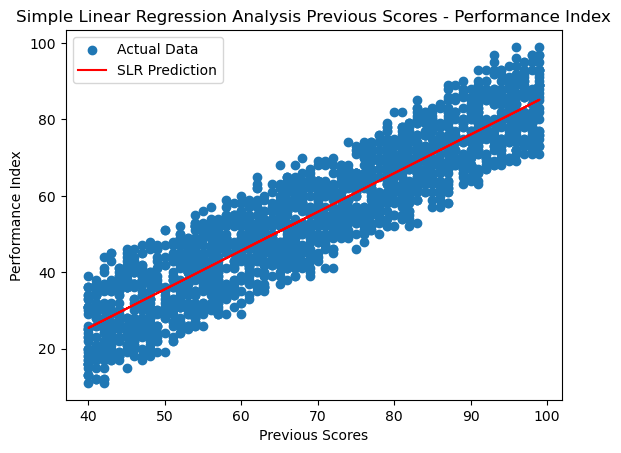

In [100]:
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='SLR Prediction')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Simple Linear Regression Analysis Previous Scores - Performance Index')
plt.legend()
plt.show()


In [102]:
nilai_sebelumnya = np.array([35, sdf.previous_scores.min(), sdf.previous_scores.max(), 100]).reshape(-1,1)
nilai_sebelumnya

array([[ 35],
       [ 40],
       [ 99],
       [100]])

In [104]:
prediksi = model.predict(nilai_sebelumnya)
prediksi

array([20.34101696, 25.40465297, 85.15555794, 86.16828515])

In [106]:
for ps, p in zip(nilai_sebelumnya, prediksi):
    print(f"nilai_sebelumnya: {ps} prediksi: {p}")

nilai_sebelumnya: [35] prediksi: 20.34101695603856
nilai_sebelumnya: [40] prediksi: 25.404652970628554
nilai_sebelumnya: [99] prediksi: 85.15555794279052
nilai_sebelumnya: [100] prediksi: 86.16828514570852


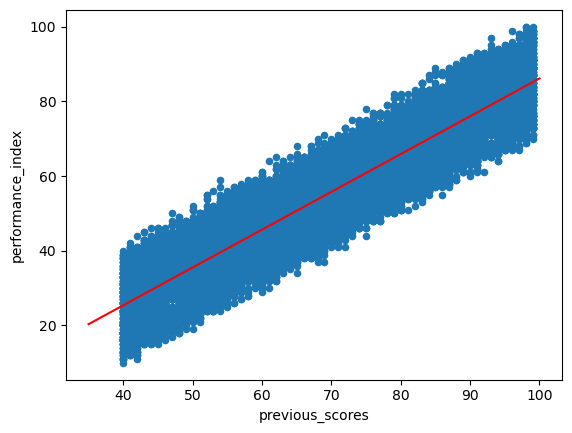

In [108]:
sdf.plot(kind='scatter', x='previous_scores', y='performance_index')
plt.plot(nilai_sebelumnya, prediksi, c='red')
plt.ticklabel_format(style='plain')
plt.show()

**Simple Linear Regression Analysis Sleep Hours - Performance Index**

In [118]:
X = sdf[['sleep_hours']]  # Fitur independen
y = sdf['performance_index']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [120]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Intercept :{model.intercept_}") #intercept = nilai y, saat nilai x = 0
print(f"Slope :{model.coef_}") #slope = delta y / delta x

MSE: 369.4356
R-squared: 0.0031
Intercept :52.02532258009737
Slope :[0.50234879]


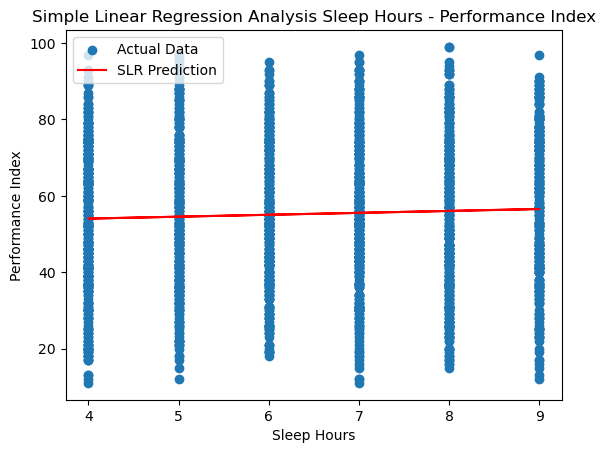

In [122]:
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='SLR Prediction')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Simple Linear Regression Analysis Sleep Hours - Performance Index')
plt.legend()
plt.show()


In [124]:
jam_tidur = np.array([3, sdf.sleep_hours.min(), sdf.sleep_hours.max(), 10]).reshape(-1,1)
jam_tidur

array([[ 3],
       [ 4],
       [ 9],
       [10]])

In [126]:
prediksi = model.predict(jam_tidur)
prediksi

array([53.53236896, 54.03471775, 56.54646171, 57.04881051])

In [128]:
for sh, p in zip(jam_tidur, prediksi):
    print(f"jam_tidur: {sh} prediksi: {p}")

jam_tidur: [3] prediksi: 53.53236895767296
jam_tidur: [4] prediksi: 54.034717750198155
jam_tidur: [9] prediksi: 56.54646171282413
jam_tidur: [10] prediksi: 57.04881050534933


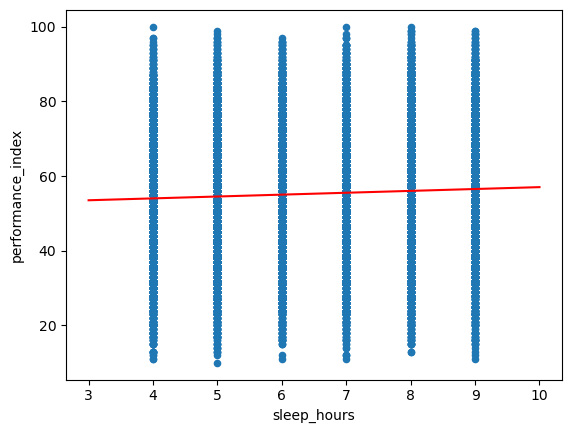

In [130]:
sdf.plot(kind='scatter', x='sleep_hours', y='performance_index')
plt.plot(jam_tidur, prediksi, c='red')
plt.ticklabel_format(style='plain')
plt.show()

**Simple Linear Regression Sample Question Papers Practiced - Performance Index**

In [134]:
X = sdf[['sample_question_papers_practiced']]  # Fitur independen
y = sdf['performance_index']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [136]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Intercept :{model.intercept_}") #intercept = nilai y, saat nilai x = 0
print(f"Slope :{model.coef_}") #slope = delta y / delta x

MSE: 370.1514
R-squared: 0.0012
Intercept :53.951783879471684
Slope :[0.29453398]


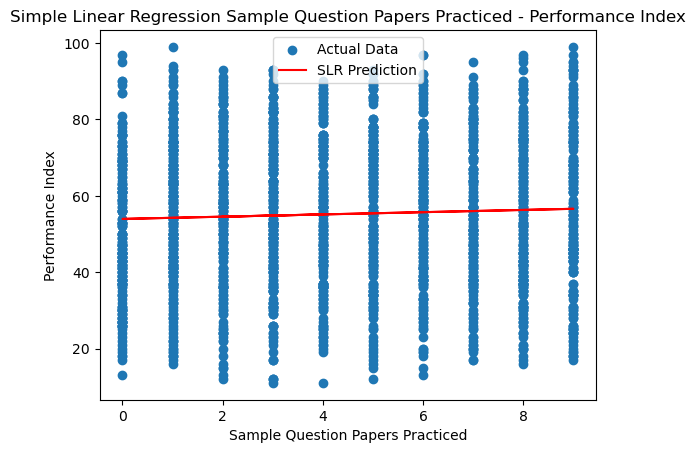

In [138]:
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='SLR Prediction')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.title('Simple Linear Regression Sample Question Papers Practiced - Performance Index')
plt.legend()
plt.show()


In [140]:
soal = np.array([sdf.sample_question_papers_practiced.min(), sdf.sample_question_papers_practiced.max(), 10]).reshape(-1,1)
soal

array([[ 0],
       [ 9],
       [10]])

In [142]:
prediksi = model.predict(soal)
prediksi

array([53.95178388, 56.6025897 , 56.89712368])

In [144]:
for sq, p in zip(soal, prediksi):
    print(f"soal: {sq} prediksi: {p}")

soal: [0] prediksi: 53.951783879471684
soal: [9] prediksi: 56.60258970309453
soal: [10] prediksi: 56.89712368349707


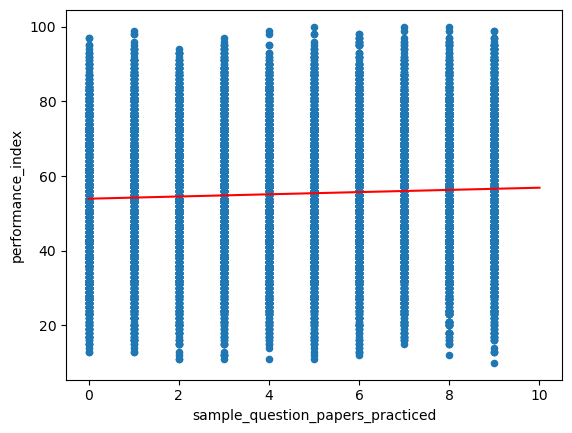

In [146]:
sdf.plot(kind='scatter', x='sample_question_papers_practiced', y='performance_index')
plt.plot(soal, prediksi, c='red')
plt.ticklabel_format(style='plain')
plt.show()

In [156]:
sdf.columns

Index(['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index'],
      dtype='object')

**Multiple Linear Regression**

In [159]:
X = sdf[['hours_studied', 'previous_scores', 'sleep_hours', 'sample_question_papers_practiced']]  # Fitur independen
y = sdf['performance_index']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [161]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Intercept :{model.intercept_}") #intercept = nilai y, saat nilai x = 0
print(f"Slope :{model.coef_}") #slope = delta y / delta x

MSE: 4.1823
R-squared: 0.9887
Intercept :-33.60206732749284
Slope :[2.85289351 1.01703572 0.47331832 0.19172629]
